# Integração Numérica

Neste notebook vamos mostrar como calcular a resposta de um problema  em vibração forçada ou livre amortecida, sujeito a uma força aplicada. Não há necessidade de o problema ser linear.

Vamos usar o integrador numérico do [SciPy](https://scipy.org), que é um módulos de funcionalidades científicas para a linguagem Python que complementa o NumPy.

## Teoria

Como praticamente todos os integradores numéricos, o do SciPy trabalha com sistemas de equações diferenciais de primeira ordem.

Temos então que transformar a equação diferencial de movimento para o nosso problema, que é uma equação diferencial de segunda ordem, em um sistema de primeira ordem.

A equação de movimento é:
$$ m \ddot x +  c \dot x + k x = f(t).$$

Vamos definir duas novas variáveis, $x_1(t) = x(t)$, e $x_2(t) = \dot x_1(t)$, desta forma, a equação original torna-se

$$ m \dot x_2 + c x_2 + k x_1 = f(t),$$

e podemos escrever o sistema de equações

$$ \left\lbrace 
\begin{aligned}
\dot x_1(t) &= x_2(t) \\
\dot x_2(t) &= \left( f(t) - c x_2(t) - k x_1(t)\right)/m 
\end{aligned}\right. $$

que esta na forma que o integrador do SciPy necessita.

## Setup

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
%matplotlib inline
import matplotlib.pyplot as plt

## Definição do sistema mecânico

In [2]:
m = 4
c = 1.2
k = 40

## Definição do sistema de EDO de primeira ordem

In [3]:
# Tome o cuidado de definir f como uma função vetorizável usando o NumPy
# Caso contrário, altere a chamada de solve_ivp para vectorized=False.

def edo(t, y, m, c, k, f):
    return y[1], (f(t) - c*y[1] - k*y[0])/m 

## Forças aplicadas

Só para testar e fazer alguns gráficos.

In [4]:
# força constante
def const_force(t):
    return 400

def ramp_force(t):
    A = 400
    d = 8
    f = np.where(t<=d, A*t/d, 0)
    return f

def nice_force(t):
    f = np.where(t<=4, -7.0*t*(t-4)*np.exp(t), 0)
    return f

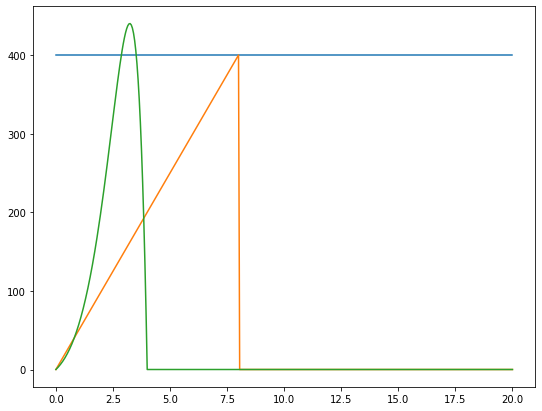

In [5]:
times = np.linspace(0, 20, 401)
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
ax.plot(times, np.full(times.shape, const_force(times)))
ax.plot(times, ramp_force(times))
x = ax.plot(times, nice_force(times))

## Integração no tempo

### Força constante

In [6]:
y0 = [0.1, 0.0]

sol_1 = solve_ivp(edo, t_span=(times[0], times[-1]), y0=y0,
                               args=(m, c, k, const_force),
                               t_eval=times, vectorized=True)
print(sol_1.message)
if sol_1.success:
    print(f"Solução convergiu após {sol_1.nfev} passos.")

The solver successfully reached the end of the integration interval.
Solução convergiu após 488 passos.


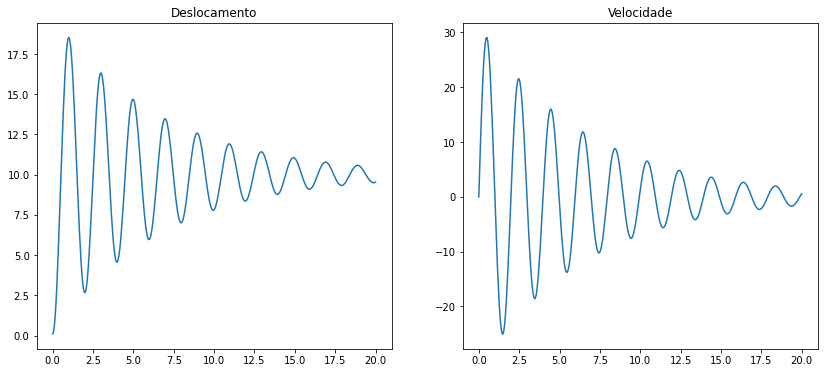

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(sol_1.t, sol_1.y[0]) # Posição
ax[0].set_title('Deslocamento')
ax[1].plot(sol_1.t, sol_1.y[1]) # Velocidade
_ = ax[1].set_title('Velocidade')

### Rampa

The solver successfully reached the end of the integration interval.
Solução convergiu após 578 passos.


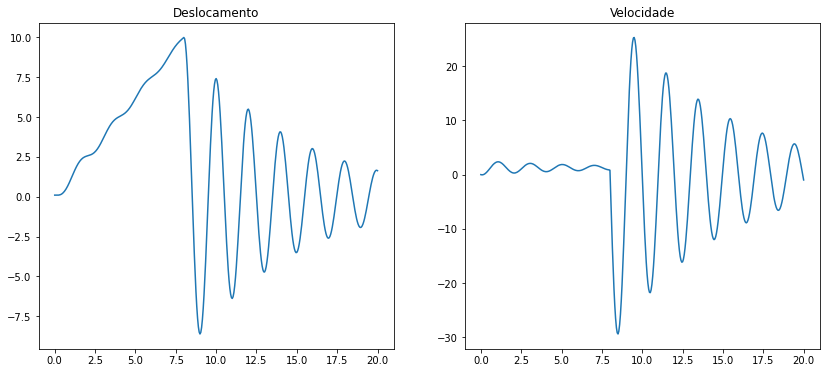

In [8]:
y0 = [0.1, 0.0]

sol_1 = sp.integrate.solve_ivp(edo, t_span=(times[0], times[-1]), y0=y0,
                               args=(m, c, k, ramp_force),
                               t_eval=times, vectorized=True)
print(sol_1.message)
if sol_1.success:
    print(f"Solução convergiu após {sol_1.nfev} passos.")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(sol_1.t, sol_1.y[0]) # Posição
ax[0].set_title('Deslocamento')
ax[1].plot(sol_1.t, sol_1.y[1]) # Velocidade
_ = ax[1].set_title('Velocidade')

### Pulso exponencial

The solver successfully reached the end of the integration interval.
Solução convergiu após 422 passos.


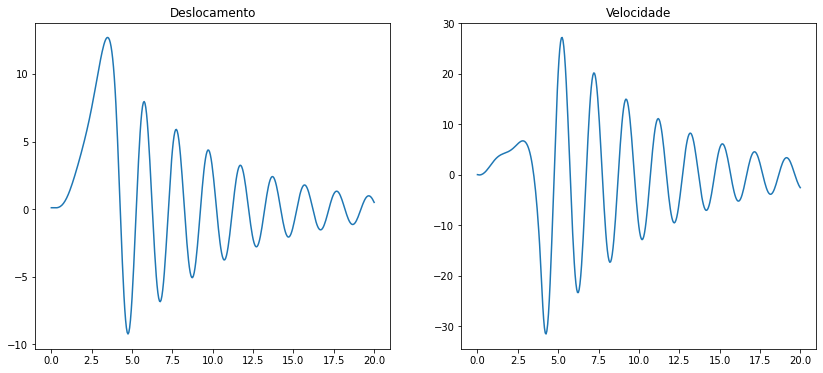

In [9]:
y0 = [0.1, 0.0]

sol_1 = sp.integrate.solve_ivp(edo, t_span=(times[0], times[-1]), y0=y0,
                               args=(m, c, k, nice_force),
                               t_eval=times, vectorized=True)
print(sol_1.message)
if sol_1.success:
    print(f"Solução convergiu após {sol_1.nfev} passos.")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(sol_1.t, sol_1.y[0]) # Posição
ax[0].set_title('Deslocamento')
ax[1].plot(sol_1.t, sol_1.y[1]) # Velocidade
_ = ax[1].set_title('Velocidade')